In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_excel("C:\\Users\\roriv\\Downloads\\barkeno_bbdd.xlsx")

In [4]:
df_barkeno=data.copy()
df_barkeno

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Priscila Soares,1,0,1,2021-04-30 00:00:00,1,2021-12-27 00:00:00,10:00:00,0,5,0,NaN,NaN,NaN
1,Priscila Soares,1,0,1,2021-04-30 00:00:00,2,2021-12-30 00:00:00,16:00:00,1,5,0,NaN,NaN,NaN
2,Estela Souto FernÃ¡ndez,2,0,2,2021-08-12 00:00:00,1,2021-12-06 00:00:00,10:00:00,1,5,1,NaN,NaN,NaN
3,Isabel Lisbona,3,0,3,2021-09-16 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0,NaN,NaN,NaN
4,Fiorella Moreno,3,0,3,2021-09-15 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131110,Rosangel Mata,6,0,6,2023-08-29 00:00:00,2,2023-08-31 00:00:00,16:00:00,1,5,0,NaN,NaN,NaN
131111,Natalia Petrova,1,2,1,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0,NaN,NaN,NaN
131112,Magda Aguilar,2,0,2,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0,NaN,NaN,NaN
131113,Rachelle K,2,0,2,2023-08-29 00:00:00,2,2023-08-29 00:00:00,16:00:00,2,4,0,NaN,NaN,NaN


In [5]:
df_barkeno = df_barkeno.drop(["Unnamed: 11", "Unnamed: 12", "Unnamed: 13"], axis=1)

In [6]:
df_barkeno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131115 entries, 0 to 131114
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nom                131082 non-null  object
 1   pax_reserva        131093 non-null  object
 2   pax_reserva_menor  131111 non-null  object
 3   pax_real           131113 non-null  object
 4   dia_reserva        130971 non-null  object
 5   id_visita          131115 non-null  object
 6   dia_visita         131115 non-null  object
 7   hora_visita        131115 non-null  object
 8   id_idioma_visita   131115 non-null  object
 9   id_origen_reserva  131115 non-null  object
 10  realitzat          131115 non-null  object
dtypes: object(11)
memory usage: 11.0+ MB


In [7]:
valores_nulos = df_barkeno.isnull()

# Contar valores nulos por columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Imprimir la cantidad de valores nulos por columna
print(cantidad_nulos_por_columna)

nom                   33
pax_reserva           22
pax_reserva_menor      4
pax_real               2
dia_reserva          144
id_visita              0
dia_visita             0
hora_visita            0
id_idioma_visita       0
id_origen_reserva      0
realitzat              0
dtype: int64


In [8]:
df_barkeno['dia_reserva']

0         2021-04-30 00:00:00
1         2021-04-30 00:00:00
2         2021-08-12 00:00:00
3         2021-09-16 00:00:00
4         2021-09-15 00:00:00
                 ...         
131110    2023-08-29 00:00:00
131111    2023-08-29 00:00:00
131112    2023-08-29 00:00:00
131113    2023-08-29 00:00:00
131114    2023-08-29 00:00:00
Name: dia_reserva, Length: 131115, dtype: object

In [9]:
df_barkeno_filtrado = df_barkeno[df_barkeno['dia_reserva'].isnull()]

In [10]:
df_barkeno_filtrado

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat
129232,#Sistema,0,0,0,NaN,2,2023-09-01 00:00:00,09:00:00,1,1,0
129233,#Sistema,0,0,0,NaN,2,2023-09-01 00:00:00,09:00:00,1,1,0
129234,#Sistema,0,0,0,NaN,2,2023-09-01 00:00:00,09:00:00,1,1,0
129235,#Sistema,0,0,0,NaN,2,2023-09-02 00:00:00,10:30:00,1,1,0
129236,#Sistema,0,0,0,NaN,2,2023-09-02 00:00:00,10:30:00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
129930,#Sistema,0,0,0,NaN,2,2023-09-26 00:00:00,10:00:00,2,1,0
129931,#Sistema,0,0,0,NaN,2,2023-09-27 00:00:00,10:00:00,2,1,0
129932,#Sistema,0,0,0,NaN,2,2023-09-28 00:00:00,10:00:00,2,1,0
129933,#Sistema,0,0,0,NaN,2,2023-09-29 00:00:00,10:00:00,2,1,0


In [11]:
df_barkeno = df_barkeno.dropna(subset=['dia_reserva'])

In [12]:
valores_nulos = df_barkeno.isnull()

# Contar valores nulos por columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Imprimir la cantidad de valores nulos por columna
print(cantidad_nulos_por_columna)

nom                  33
pax_reserva          22
pax_reserva_menor     4
pax_real              2
dia_reserva           0
id_visita             0
dia_visita            0
hora_visita           0
id_idioma_visita      0
id_origen_reserva     0
realitzat             0
dtype: int64


In [13]:
df_barkeno_filtrado2 = df_barkeno[df_barkeno['pax_reserva'].isnull()]
df_barkeno_filtrado2


,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat
18015,Iris Angler&oacute,NaN,6,0,6,2022-04-15 00:00:00,2,2022-04-15 00:00:00,16:00:00,1,1
21333,Jos&eacute,NaN,1,0,1,2022-05-04 00:00:00,2,2022-05-04 00:00:00,16:00:00,1,1
29374,Jos&eacute,NaN,2,0,2,2022-06-19 00:00:00,2,2022-06-19 00:00:00,16:00:00,2,1
29954,Nicolas Par&eacute,NaN,1,0,1,2022-06-22 00:00:00,1,2022-06-22 00:00:00,16:30:00,1,1
35154,Nil Teixid&oacute,NaN,1,0,1,2022-07-19 00:00:00,1,2022-07-22 00:00:00,10:00:00,1,1
45327,Eva Maria Requena Meli&aacute,NaN,2,0,2,2022-09-04 00:00:00,1,2022-09-04 00:00:00,16:30:00,1,1
51161,Maria Jos&eacute,NaN,2,0,2,2022-09-30 00:00:00,1,2022-10-05 00:00:00,16:30:00,1,1
51913,Clara Wei&szlig,NaN,1,0,1,2022-10-03 00:00:00,1,2022-10-03 00:00:00,16:30:00,1,1
55425,Ariana Barcel&oacute,NaN,3,0,3,2022-10-17 00:00:00,2,2022-10-17 00:00:00,16:00:00,1,1
62207,elena Saro Jen&eacute,NaN,1,0,1,2022-11-12 00:00:00,1,2022-11-13 00:00:00,10:00:00,1,1


In [14]:
data 

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Priscila Soares,1,0,1,2021-04-30 00:00:00,1,2021-12-27 00:00:00,10:00:00,0,5,0,NaN,NaN,NaN
1,Priscila Soares,1,0,1,2021-04-30 00:00:00,2,2021-12-30 00:00:00,16:00:00,1,5,0,NaN,NaN,NaN
2,Estela Souto FernÃ¡ndez,2,0,2,2021-08-12 00:00:00,1,2021-12-06 00:00:00,10:00:00,1,5,1,NaN,NaN,NaN
3,Isabel Lisbona,3,0,3,2021-09-16 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0,NaN,NaN,NaN
4,Fiorella Moreno,3,0,3,2021-09-15 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131110,Rosangel Mata,6,0,6,2023-08-29 00:00:00,2,2023-08-31 00:00:00,16:00:00,1,5,0,NaN,NaN,NaN
131111,Natalia Petrova,1,2,1,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0,NaN,NaN,NaN
131112,Magda Aguilar,2,0,2,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0,NaN,NaN,NaN
131113,Rachelle K,2,0,2,2023-08-29 00:00:00,2,2023-08-29 00:00:00,16:00:00,2,4,0,NaN,NaN,NaN


In [15]:
columnas = ['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
valores_no_nulos = data[columnas].notna()
valores_no_nulos

,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
131110,False,False,False
131111,False,False,False
131112,False,False,False
131113,False,False,False


In [16]:
data['Unnamed: 13'].value_counts()

1.0    7
0.0    6
Name: Unnamed: 13, dtype: int64

In [17]:
mascara = (data['Unnamed: 11'].isin([0, 1, 2])) | (data['Unnamed: 12'].isin([0, 1])) | (data['Unnamed: 13'].isin([0, 1]))

# Filtrar el DataFrame usando la máscara
filas_con_0_o_1 = data[mascara]
filas_con_0_o_1

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,Unnamed: 11,Unnamed: 12,Unnamed: 13
1440,Mar&iacute,a &aacute,ngeles fulgueiras,2,0,2,2021-11-30 00:00:00,1,2021-12-02 00:00:00,10:00:00,1,1.0,1.0,NaN
1928,Pablo Hern&aacute,ndez Juan,2,0,2,2021-12-03 00:00:00,2,2021-12-05 00:00:00,16:00:00,1,1,0.0,NaN,NaN
1929,Pablo Hern&aacute,ndez Juan,2,0,2,2021-12-03 00:00:00,2,2021-12-05 00:00:00,16:00:00,1,1,1.0,NaN,NaN
1963,Juan Carlos Garc&iacute,a,2,0,2,2021-12-03 00:00:00,2,2021-12-07 00:00:00,16:00:00,1,1,0.0,NaN,NaN
1964,Juan Carlos Garc&iacute,a,2,0,2,2021-12-03 00:00:00,2,2021-12-07 00:00:00,16:00:00,1,1,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130626,Mariel Rodr&iacute,guez,3,0,3,2023-08-27 00:00:00,2,2023-08-28 00:00:00,16:00:00,1,1,1.0,NaN,NaN
130818,Pablo vizca&iacute,no,2,0,2,2023-08-28 00:00:00,2,2023-08-28 00:00:00,16:00:00,1,1,1.0,NaN,NaN
130819,Pablo vizca&iacute,no,2,0,2,2023-08-28 00:00:00,6,2023-09-05 00:00:00,11:00:00,1,1,0.0,NaN,NaN
130912,Mar&iacute,a Sampedro,2,0,2,2023-08-28 00:00:00,2,2023-08-29 00:00:00,16:00:00,1,1,0.0,NaN,NaN


In [18]:
mascara13 =  (data['Unnamed: 13'].isin([0, 1]))

# Filtrar el DataFrame usando la máscara
filas = data[mascara13]
filas

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,Unnamed: 11,Unnamed: 12,Unnamed: 13
7746,Jorge Andr&eacute,s Santib&aacute,&ntilde,ez,2,0,2,2022-02-02 00:00:00,1,2022-03-08 00:00:00,10:00:00,1.0,1.0,0.0
7747,Jorge Andr&eacute,s Santib&aacute,&ntilde,ez,2,0,2,2022-02-02 00:00:00,1,2022-03-08 00:00:00,10:00:00,1.0,1.0,0.0
7748,Jorge Andr&eacute,s Santib&aacute,&ntilde,ez,2,0,2,2022-02-02 00:00:00,2,2022-03-08 00:00:00,16:00:00,1.0,1.0,1.0
7749,Jorge Andr&eacute,s Santib&aacute,&ntilde,ez,2,0,2,2022-02-02 00:00:00,2,2022-03-08 00:00:00,16:00:00,1.0,1.0,0.0
17100,&Aacute,lvaro Monta&ntilde,ez Garc&iacute,a,2,0,2,2022-04-11 00:00:00,3,2022-04-13 00:00:00,11:00:00,1.0,1.0,0.0
45745,Nat&aacute,lia Bajz&iacute,kov&aacute,NaN,2,0,2,2022-09-05 00:00:00,6,2022-09-06 00:00:00,11:00:00,1.0,1.0,1.0
69330,TOM&Aacute,&Scaron,HOLU&Scaron,A,1,0,1,2022-12-16 00:00:00,1,2022-12-17 00:00:00,10:30:00,2.0,1.0,1.0
75290,Nicol&aacute,s Jes&uacute,s Mart&iacute,nez,1,0,1,2023-01-13 00:00:00,2,2023-01-13 00:00:00,16:00:00,1.0,1.0,1.0
90956,Nicol&aacute,s L&oacute,pez Alcal&aacute,NaN,2,0,2,2023-03-16 00:00:00,6,2023-03-23 00:00:00,11:00:00,1.0,1.0,1.0
97902,M&oacute,nica Ib&aacute,&ntilde,ez Pardo,2,0,2,2023-04-12 00:00:00,2,2023-04-12 00:00:00,16:00:00,1.0,1.0,0.0


In [19]:
data_copy3=data.copy()

In [20]:
df_barkeno

,nom,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat
0,Priscila Soares,1,0,1,2021-04-30 00:00:00,1,2021-12-27 00:00:00,10:00:00,0,5,0
1,Priscila Soares,1,0,1,2021-04-30 00:00:00,2,2021-12-30 00:00:00,16:00:00,1,5,0
2,Estela Souto FernÃ¡ndez,2,0,2,2021-08-12 00:00:00,1,2021-12-06 00:00:00,10:00:00,1,5,1
3,Isabel Lisbona,3,0,3,2021-09-16 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0
4,Fiorella Moreno,3,0,3,2021-09-15 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...
131110,Rosangel Mata,6,0,6,2023-08-29 00:00:00,2,2023-08-31 00:00:00,16:00:00,1,5,0
131111,Natalia Petrova,1,2,1,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0
131112,Magda Aguilar,2,0,2,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0
131113,Rachelle K,2,0,2,2023-08-29 00:00:00,2,2023-08-29 00:00:00,16:00:00,2,4,0


In [21]:
df_barkeno['pax_reserva'].value_counts()

2                  63744
1                  35871
3                  14705
4                  10672
5                   2885
                   ...  
rez Guerrero           1
guez Amezcua           1
mmerli                 1
a Marta Noriega        1
a Sampedro             1
Name: pax_reserva, Length: 368, dtype: int64

In [22]:
# Supongamos que 'df_barkeno' es tu DataFrame actual
# Crea una lista de dígitos válidos del 0 al 10
digitos_validos = list(map(str, range(11)))

# Filtra el DataFrame para mantener solo las filas que contienen dígitos válidos en 'pax_reserva'
df_barkeno = df_barkeno[df_barkeno['pax_reserva'].astype(str).str.strip().isin(digitos_validos)]

# Ahora df_barkeno contiene solo las filas con dígitos numéricos válidos en 'pax_reserva'

In [23]:
valores_nulos = df_barkeno.isnull()

# Contar valores nulos por columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Imprimir la cantidad de valores nulos por columna
print(cantidad_nulos_por_columna)

nom                  33
pax_reserva           0
pax_reserva_menor     0
pax_real              0
dia_reserva           0
id_visita             0
dia_visita            0
hora_visita           0
id_idioma_visita      0
id_origen_reserva     0
realitzat             0
dtype: int64


In [24]:
df_barkeno2 = df_barkeno.drop(['nom'], axis=1)
df_barkeno2

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat
0,1,0,1,2021-04-30 00:00:00,1,2021-12-27 00:00:00,10:00:00,0,5,0
1,1,0,1,2021-04-30 00:00:00,2,2021-12-30 00:00:00,16:00:00,1,5,0
2,2,0,2,2021-08-12 00:00:00,1,2021-12-06 00:00:00,10:00:00,1,5,1
3,3,0,3,2021-09-16 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0
4,3,0,3,2021-09-15 00:00:00,1,2021-12-30 00:00:00,10:00:00,1,5,0
...,...,...,...,...,...,...,...,...,...,...
131110,6,0,6,2023-08-29 00:00:00,2,2023-08-31 00:00:00,16:00:00,1,5,0
131111,1,2,1,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0
131112,2,0,2,2023-08-29 00:00:00,1,2023-08-30 00:00:00,16:30:00,1,5,0
131113,2,0,2,2023-08-29 00:00:00,2,2023-08-29 00:00:00,16:00:00,2,4,0


In [25]:
df_barkeno2.isnull().sum()


pax_reserva          0
pax_reserva_menor    0
pax_real             0
dia_reserva          0
id_visita            0
dia_visita           0
hora_visita          0
id_idioma_visita     0
id_origen_reserva    0
realitzat            0
dtype: int64

In [26]:
import pandas as pd

# Convierte las columnas 'dia_reserva' y 'dia_visita' al formato datetime
df_barkeno2['dia_reserva'] = pd.to_datetime(df_barkeno2['dia_reserva'])
df_barkeno2['dia_visita'] = pd.to_datetime(df_barkeno2['dia_visita'])

# Crea una columna nueva con el nombre del día de la semana
df_barkeno2['nombre_dia_reserva'] = df_barkeno2['dia_reserva'].dt.strftime('%A')
df_barkeno2['nombre_dia_visita'] = df_barkeno2['dia_visita'].dt.strftime('%A')

In [ ]:

# Supongamos que 'df_barkeno2' es tu DataFrame actual
# Convierte las columnas 'dia_reserva' y 'dia_visita' al formato de fecha
df_barkeno2['dia_reserva'] = pd.to_datetime(df_barkeno2['dia_reserva'], format='%Y%m%d %H:%M:%S')
df_barkeno2['dia_visita'] = pd.to_datetime(df_barkeno2['dia_visita'], format='%Y%m%d %H:%M:%S')

# Extrae la fecha sin la hora
df_barkeno2['dia_reserva'] = df_barkeno2['dia_reserva'].dt.date
df_barkeno2['dia_visita'] = df_barkeno2['dia_visita'].dt.date

# Crea una columna nueva con el nombre del día de la semana
df_barkeno2['nombre_dia_reserva'] = df_barkeno2['dia_reserva'].dt.strftime('%A')
df_barkeno2['nombre_dia_visita'] = df_barkeno2['dia_visita'].dt.strftime('%A')

# Elimina la columna de hora si no la necesitas más
# del df_barkeno2['dia_reserva']
# del df_barkeno2['dia_visita']
#Este código convertirá las columnas 'dia_reserva' y 'dia_visita' al formato de fecha adecuado, luego extraerá la fecha y finalmente creará una nueva columna con el nombre del día de la semana correspondiente (por ejemplo, "lunes", "martes", etc.). Puedes eliminar la columna de hora si ya no la necesitas en tu DataFrame.


In [28]:
# Supongamos que 'df_barkeno2' es tu DataFrame

# Convierte las columnas 'dia_reserva' y 'dia_visita' al formato de fecha
df_barkeno2['dia_reserva'] = pd.to_datetime(df_barkeno2['dia_reserva'], format='%Y%m%d %H:%M:%S')
df_barkeno2['dia_visita'] = pd.to_datetime(df_barkeno2['dia_visita'], format='%Y%m%d %H:%M:%S')

# Extrae la fecha de las columnas y crea una nueva columna con el nombre del día de la semana
df_barkeno2['fecha_reserva'] = df_barkeno2['dia_reserva'].dt.date
df_barkeno2['fecha_visita'] = df_barkeno2['dia_visita'].dt.date

df_barkeno2['nombre_dia_reserva'] = df_barkeno2['dia_reserva'].dt.strftime('%A')
df_barkeno2['nombre_dia_visita'] = df_barkeno2['dia_visita'].dt.strftime('%A')

# Elimina las columnas originales si es necesario
# del df_barkeno2['dia_reserva']
# del df_barkeno2['dia_visita']

# Muestra el DataFrame resultante
df_barkeno2

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,fecha_reserva,fecha_visita
0,1,0,1,2021-04-30,1,2021-12-27,10:00:00,0,5,0,Friday,Monday,2021-04-30,2021-12-27
1,1,0,1,2021-04-30,2,2021-12-30,16:00:00,1,5,0,Friday,Thursday,2021-04-30,2021-12-30
2,2,0,2,2021-08-12,1,2021-12-06,10:00:00,1,5,1,Thursday,Monday,2021-08-12,2021-12-06
3,3,0,3,2021-09-16,1,2021-12-30,10:00:00,1,5,0,Thursday,Thursday,2021-09-16,2021-12-30
4,3,0,3,2021-09-15,1,2021-12-30,10:00:00,1,5,0,Wednesday,Thursday,2021-09-15,2021-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131110,6,0,6,2023-08-29,2,2023-08-31,16:00:00,1,5,0,Tuesday,Thursday,2023-08-29,2023-08-31
131111,1,2,1,2023-08-29,1,2023-08-30,16:30:00,1,5,0,Tuesday,Wednesday,2023-08-29,2023-08-30
131112,2,0,2,2023-08-29,1,2023-08-30,16:30:00,1,5,0,Tuesday,Wednesday,2023-08-29,2023-08-30
131113,2,0,2,2023-08-29,2,2023-08-29,16:00:00,2,4,0,Tuesday,Tuesday,2023-08-29,2023-08-29


In [29]:
# Supongamos que 'df_barkeno2' es tu DataFrame

# Define diccionarios de mapeo para reemplazar los valores en cada columna
mapeo_id_origen_reserva = {
    1: 'Barkeno Tours',
    2: 'GuruWalk',
    3: 'Yoorney',
    4: 'FreeTours',
    5: 'Civitatis',
    6: 'ReservaFreeTours',
    7: 'Be Local',
    8: 'Vipealo',
    9: 'Walkative',
    10: 'Buen Dia Tours',
    11: 'PuntoTours',
    12: 'By Foot',
    13: 'My Top Tour',
    14: 'Arkeo Tour',
    15: 'Atrápalo',
    16: 'Viabam'
}

mapeo_id_idioma_visita = {
    1: 'Castellano',
    2: 'Inglés',
    3: 'Francés',
    4: 'Italiano'
}

mapeo_id_visita = {
    1: 'Gótico',
    2: 'Modernismo',
    3: 'Raval',
    6: 'Born',
    7: 'Ciutadella',
    8: 'Maó',
    9: 'Tarragona'
    # Agrega los demás valores según sea necesario
}

# Reemplaza los valores en las columnas utilizando el diccionario de mapeo
df_barkeno2['id_origen_reserva'] = df_barkeno2['id_origen_reserva'].replace(mapeo_id_origen_reserva)
df_barkeno2['id_idioma_visita'] = df_barkeno2['id_idioma_visita'].replace(mapeo_id_idioma_visita)
df_barkeno2['id_visita'] = df_barkeno2['id_visita'].replace(mapeo_id_visita)

# Muestra el DataFrame resultante
df_barkeno2

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,fecha_reserva,fecha_visita
0,1,0,1,2021-04-30,Gótico,2021-12-27,10:00:00,0,Civitatis,0,Friday,Monday,2021-04-30,2021-12-27
1,1,0,1,2021-04-30,Modernismo,2021-12-30,16:00:00,Castellano,Civitatis,0,Friday,Thursday,2021-04-30,2021-12-30
2,2,0,2,2021-08-12,Gótico,2021-12-06,10:00:00,Castellano,Civitatis,1,Thursday,Monday,2021-08-12,2021-12-06
3,3,0,3,2021-09-16,Gótico,2021-12-30,10:00:00,Castellano,Civitatis,0,Thursday,Thursday,2021-09-16,2021-12-30
4,3,0,3,2021-09-15,Gótico,2021-12-30,10:00:00,Castellano,Civitatis,0,Wednesday,Thursday,2021-09-15,2021-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131110,6,0,6,2023-08-29,Modernismo,2023-08-31,16:00:00,Castellano,Civitatis,0,Tuesday,Thursday,2023-08-29,2023-08-31
131111,1,2,1,2023-08-29,Gótico,2023-08-30,16:30:00,Castellano,Civitatis,0,Tuesday,Wednesday,2023-08-29,2023-08-30
131112,2,0,2,2023-08-29,Gótico,2023-08-30,16:30:00,Castellano,Civitatis,0,Tuesday,Wednesday,2023-08-29,2023-08-30
131113,2,0,2,2023-08-29,Modernismo,2023-08-29,16:00:00,Inglés,FreeTours,0,Tuesday,Tuesday,2023-08-29,2023-08-29


In [30]:
# Convierte las columnas en enteros
df_barkeno2['pax_reserva'] = df_barkeno2['pax_reserva'].astype(int)
df_barkeno2['pax_reserva_menor'] = df_barkeno2['pax_reserva_menor'].astype(int)
df_barkeno2['pax_real'] = df_barkeno2['pax_real'].astype(int)


In [31]:
# Supongamos que 'df_barkeno2' es tu DataFrame

# Reemplaza los valores igual a 0 en 'id_idioma_visita' por 'Castellano'
df_barkeno2['id_idioma_visita'] = df_barkeno2['id_idioma_visita'].replace(0, 'Castellano')



In [32]:
df_barkeno2['id_visita'] = df_barkeno2['id_visita'].replace(0, 'Gótico')


In [33]:
df_barkeno2.hora_visita.value_counts()

10:00:00    38487
16:00:00    35022
16:30:00    27960
10:30:00    13596
11:00:00    11371
09:00:00     1464
13:00:00     1005
19:00:00      596
20:00:00      286
17:00:00      209
12:00:00      142
12:30:00       30
22:00:00        2
10:04:00        2
15:00:00        2
00:00:00        2
15:30:00        1
Name: hora_visita, dtype: int64

In [34]:
df_barkeno2['hora_visita'] = df_barkeno2['hora_visita'].replace('10:04', '10:00')

In [ ]:
# Convierte la columna 'hora_visita' a objeto datetime con el formato '%H:%M'
df_barkeno2['hora_visita'] = pd.to_datetime(df_barkeno2['hora_visita'], format='%H:%M')

# Ahora puedes extraer solo la parte de la hora y los minutos
df_barkeno2['hora_visita'] = df_barkeno2['hora_visita'].dt.strftime('%H:%M')


In [36]:
# Primero, calcula las ocurrencias de cada valor en 'hora_visita'
ocurrencias_hora = df_barkeno2['hora_visita'].value_counts()

# Encuentra los valores que tienen al menos 30 ocurrencias
valores_con_suficientes_ocurrencias = ocurrencias_hora[ocurrencias_hora >= 30].index

# Filtra el DataFrame para incluir solo las filas con valores en 'hora_visita' que cumplen el criterio
df_barkeno2_filtrado = df_barkeno2[df_barkeno2['hora_visita'].isin(valores_con_suficientes_ocurrencias)]


In [37]:
df_barkeno2_filtrado.hora_visita.value_counts()

10:00:00    38487
16:00:00    35022
16:30:00    27960
10:30:00    13596
11:00:00    11371
09:00:00     1464
13:00:00     1005
19:00:00      596
20:00:00      286
17:00:00      209
12:00:00      142
12:30:00       30
Name: hora_visita, dtype: int64

In [38]:
df_barkeno2['diferencia_dias'] = (df_barkeno2['dia_visita'] - df_barkeno2['dia_reserva']).dt.days


In [39]:
df_barkeno2.drop(['fecha_reserva', 'fecha_visita'], axis=1, inplace=True)

In [40]:
df_barkeno2

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,diferencia_dias
0,1,0,1,2021-04-30,Gótico,2021-12-27,10:00:00,Castellano,Civitatis,0,Friday,Monday,241
1,1,0,1,2021-04-30,Modernismo,2021-12-30,16:00:00,Castellano,Civitatis,0,Friday,Thursday,244
2,2,0,2,2021-08-12,Gótico,2021-12-06,10:00:00,Castellano,Civitatis,1,Thursday,Monday,116
3,3,0,3,2021-09-16,Gótico,2021-12-30,10:00:00,Castellano,Civitatis,0,Thursday,Thursday,105
4,3,0,3,2021-09-15,Gótico,2021-12-30,10:00:00,Castellano,Civitatis,0,Wednesday,Thursday,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131110,6,0,6,2023-08-29,Modernismo,2023-08-31,16:00:00,Castellano,Civitatis,0,Tuesday,Thursday,2
131111,1,2,1,2023-08-29,Gótico,2023-08-30,16:30:00,Castellano,Civitatis,0,Tuesday,Wednesday,1
131112,2,0,2,2023-08-29,Gótico,2023-08-30,16:30:00,Castellano,Civitatis,0,Tuesday,Wednesday,1
131113,2,0,2,2023-08-29,Modernismo,2023-08-29,16:00:00,Inglés,FreeTours,0,Tuesday,Tuesday,0


In [41]:
df_barkeno2.realitzat.value_counts()

1    89998
0    40179
Name: realitzat, dtype: int64

In [48]:
nombre_archivo = 'df_barkeno2.csv'

# Guarda el DataFrame en un archivo CSV
df_barkeno2.to_csv(nombre_archivo, index=False) 

df_final['profit'] = np.where(df_final['id_origen_reserva'] == 'Barkeno Tours', df_final['pax_reserva'] * 3, df_final['pax_real'] * 0.5)
df_final

In [42]:
#Creo una copia de seguridad.
df_barkeno3= df_barkeno2.copy()

In [43]:
# ordeno mi Dataframe en base a las fechas de visita.

df_barkeno3 = df_barkeno3.sort_values(by='dia_visita')

### SERIES DE TIEMPO 

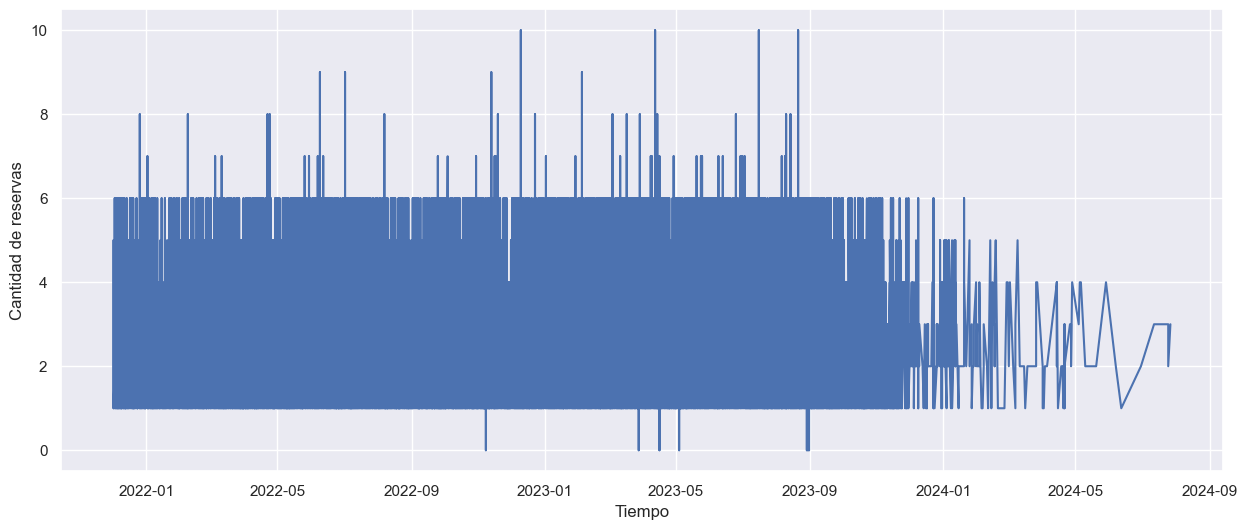

In [46]:
plt.figure(figsize = (15,6))
plt.plot(df_barkeno3.dia_visita, df_barkeno3.pax_real)
#plt.xlim(datetime.date(2008,2,1), datetime.date(2008,5,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de reservas')
plt.show()

### JOIN CON VARIABLES CLIMATOLOGICAS 

In [54]:
ruta_archivo_csv = "C:\\Users\\roriv\\OneDrive\\Desktop\\BARKENO\\metereologico.xlsx"

# Lee el archivo CSV en un DataFrame
data_metereologico = pd.read_excel(ruta_archivo_csv)

In [58]:
data_metereologico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       605 non-null    object 
 1   indicativo  605 non-null    object 
 2   nombre      605 non-null    object 
 3   provincia   605 non-null    object 
 4   altitud     605 non-null    int64  
 5   tmed        604 non-null    object 
 6   prec        603 non-null    object 
 7   tmin        604 non-null    object 
 8   horatmin    602 non-null    object 
 9   tmax        604 non-null    object 
 10  horatmax    604 non-null    object 
 11  dir         604 non-null    float64
 12  velmedia    605 non-null    object 
 13  racha       604 non-null    object 
 14  horaracha   604 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 71.0+ KB


In [ ]:
# primero, debo terminar 


In [ ]:
# voy a hacer un join con el DF metereologico
resultado_join = df_barkeno3.merge(data_metereologico, left_on='dia_visita', right_on='fecha', how='inner')

In [59]:
import pymysql # conecta python con SQL
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

In [60]:
# @localhost/superstore --> specifies the database in which tables are going to be introduced!
connection_string = 'mysql+pymysql://root:' + password + '@localhost/barkeno_project'
engine = create_engine(connection_string)

In [63]:
# Store the DataFrame in MySQL with the same sheet name as the table name
df_barkeno3.to_sql(name="df_barkeno3",con=engine, if_exists='replace', index=False)

130177

In [64]:
data_metereologico.to_sql(name="data_metereologico",con=engine, if_exists='replace', index=False)

605

In [85]:
consulta_sql = """
SELECT b.*, M.prec, M.tmed, M.tmin, M.tmax, M.racha
FROM df_barkeno3 B
JOIN data_metereologico M
ON b.dia_visita = M.fecha
ORDER BY B.dia_reserva;
"""

# Ejecuta la consulta SQL y carga los resultados en un DataFrame
df_resultado_sql3= pd.read_sql_query(consulta_sql, connection_string)




Dada la dispersion de datos de las variables, voy a generar rangos para agrupar las variables de temperatura y precipitaciones. 

In [88]:
df_resultado_sql3

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,diferencia_dias,prec,tmed,tmin,tmax,racha
0,1,0,1,2021-04-30,Gótico,2021-12-27,0 days 10:00:00,Castellano,Civitatis,0,Friday,Monday,241,"0,0","16,6","12,9","20,4","13,3"
1,1,0,1,2021-04-30,Modernismo,2021-12-30,0 days 16:00:00,Castellano,Civitatis,0,Friday,Thursday,244,"0,0","16,4","12,9","20,0","6,4"
2,2,0,2,2021-08-12,Gótico,2021-12-06,0 days 10:00:00,Castellano,Civitatis,1,Thursday,Monday,116,"0,0","10,4","6,2","14,7","8,6"
3,1,0,1,2021-08-12,Gótico,2022-01-20,0 days 10:30:00,Inglés,FreeTours,0,Thursday,Thursday,161,"0,0","9,6","5,3","13,8","7,2"
4,4,0,4,2021-08-20,Modernismo,2021-12-04,0 days 16:00:00,Castellano,Civitatis,1,Friday,Saturday,106,"0,0","13,2","9,0","17,5","13,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,4,2,2,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,FreeTours,1,Tuesday,Tuesday,0,"40,2","21,6","17,2","26,1","23,3"
59307,2,0,2,2023-08-29,Modernismo,2023-08-29,0 days 16:00:00,Castellano,Barkeno Tours,0,Tuesday,Tuesday,0,"40,2","21,6","17,2","26,1","23,3"
59308,3,0,3,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,GuruWalk,0,Tuesday,Tuesday,0,"40,2","21,6","17,2","26,1","23,3"
59309,1,0,1,2023-08-29,Gótico,2023-08-29,0 days 16:30:00,Inglés,FreeTours,0,Tuesday,Tuesday,0,"40,2","21,6","17,2","26,1","23,3"


In [89]:
# Lista de columnas en las que deseas reemplazar comas por puntos
columnas_a_modificar = ['prec', 'tmed', 'tmin', 'tmax', 'racha']

# Reemplaza comas por puntos en las columnas especificadas
for columna in columnas_a_modificar:
    df_resultado_sql3[columna] = df_resultado_sql3[columna].str.replace(',', '.', regex=False)

# Convierte las columnas a números de punto flotante (float)
df_resultado_sql3[columnas_a_modificar] = df_resultado_sql3[columnas_a_modificar].astype(float)

In [90]:
# Lista de columnas a convertir a enteros
columnas_a_convertir = ['prec', 'tmed', 'tmin', 'tmax', 'racha']

# Convierte las columnas a números enteros (integer)
for columna in columnas_a_convertir:
    df_resultado_sql3[columna] = pd.to_numeric(df_resultado_sql3[columna])

In [91]:
df_resultado_sql3

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,diferencia_dias,prec,tmed,tmin,tmax,racha
0,1,0,1,2021-04-30,Gótico,2021-12-27,0 days 10:00:00,Castellano,Civitatis,0,Friday,Monday,241,0.0,16.6,12.9,20.4,13.3
1,1,0,1,2021-04-30,Modernismo,2021-12-30,0 days 16:00:00,Castellano,Civitatis,0,Friday,Thursday,244,0.0,16.4,12.9,20.0,6.4
2,2,0,2,2021-08-12,Gótico,2021-12-06,0 days 10:00:00,Castellano,Civitatis,1,Thursday,Monday,116,0.0,10.4,6.2,14.7,8.6
3,1,0,1,2021-08-12,Gótico,2022-01-20,0 days 10:30:00,Inglés,FreeTours,0,Thursday,Thursday,161,0.0,9.6,5.3,13.8,7.2
4,4,0,4,2021-08-20,Modernismo,2021-12-04,0 days 16:00:00,Castellano,Civitatis,1,Friday,Saturday,106,0.0,13.2,9.0,17.5,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,4,2,2,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,FreeTours,1,Tuesday,Tuesday,0,40.2,21.6,17.2,26.1,23.3
59307,2,0,2,2023-08-29,Modernismo,2023-08-29,0 days 16:00:00,Castellano,Barkeno Tours,0,Tuesday,Tuesday,0,40.2,21.6,17.2,26.1,23.3
59308,3,0,3,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,GuruWalk,0,Tuesday,Tuesday,0,40.2,21.6,17.2,26.1,23.3
59309,1,0,1,2023-08-29,Gótico,2023-08-29,0 days 16:30:00,Inglés,FreeTours,0,Tuesday,Tuesday,0,40.2,21.6,17.2,26.1,23.3


In [92]:
def clasificar_temperatura(temperatura):
    if temperatura < 0:
        return "Muy Frío"
    elif temperatura >= 0 and temperatura <= 10:
        return "Frío"
    elif temperatura > 10 and temperatura <= 20:
        return "Templado"
    elif temperatura > 20 and temperatura <= 30:
        return "Cálido"
    else:
        return "Muy Cálido"

# Aplica la clasificación en una sola línea
df_resultado_sql3['categoria_temperatura'] = df_resultado_sql3['tmed'].apply(lambda x: clasificar_temperatura(x))

In [95]:
def clasificar_precipitacion(precipitacion):
    if precipitacion == 0:
        return "Sin Precipitación"
    elif precipitacion >= 0.1 and precipitacion <= 5:
        return "Ligera Precipitación"
    elif precipitacion >= 5.1 and precipitacion <= 20:
        return "Moderada Precipitación"
    elif precipitacion >= 20.1 and precipitacion <= 40:
        return "Fuerte Precipitación"
    else:
        return "Muy Fuerte Precipitación"

# Aplica la clasificación en una sola línea
df_resultado_sql3['categoria_precipitacion'] = df_resultado_sql3['prec'].apply(lambda x: clasificar_precipitacion(x))

# Asegúrate de que la columna 'prec' sea de tipo float (número decimal)
df_resultado_sql3['prec'] = df_resultado_sql3['prec'].astype(float)

In [98]:
def clasificar_racha_viento(racha):
    if racha < 0.5:
        return "Viento Muy Bajo"
    elif racha >= 0.5 and racha <= 2.0:
        return "Viento Bajo"
    elif racha > 2.0 and racha <= 5.0:
        return "Viento Moderado"
    elif racha > 5.0 and racha <= 9.7:
        return "Viento Fuerte"
    else:
        return "Viento Muy Fuerte"

# Aplica la clasificación en una sola línea
df_resultado_sql3['categoria_racha_viento'] = df_resultado_sql3['racha'].apply(lambda x: clasificar_racha_viento(x))

In [101]:
df_resultado_sql3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59311 entries, 0 to 59310
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   pax_reserva              59311 non-null  int64          
 1   pax_reserva_menor        59311 non-null  int64          
 2   pax_real                 59311 non-null  int64          
 3   dia_reserva              59311 non-null  datetime64[ns] 
 4   id_visita                59311 non-null  object         
 5   dia_visita               59311 non-null  datetime64[ns] 
 6   hora_visita              59311 non-null  timedelta64[ns]
 7   id_idioma_visita         59311 non-null  object         
 8   id_origen_reserva        59311 non-null  object         
 9   realitzat                59311 non-null  int64          
 10  nombre_dia_reserva       59311 non-null  object         
 11  nombre_dia_visita        59311 non-null  object         
 12  diferencia_dias   

In [100]:
df_resultado_sql3.realitzat.value_counts()

1    40311
0    19000
Name: realitzat, dtype: int64

In [102]:
df_resultado_sql4=df_resultado_sql3.copy()

In [103]:
columnas_deseadas = [
    'pax_reserva',
    'pax_reserva_menor',
    'pax_real',
    'dia_reserva',
    'id_visita',
    'dia_visita',
    'hora_visita',
    'id_idioma_visita',
    'id_origen_reserva',
    'realitzat',
    'nombre_dia_reserva',
    'nombre_dia_visita',
    'diferencia_dias',
    'categoria_temperatura',
    'categoria_precipitacion',
    'categoria_racha_viento'
]

df_resultado_sql4 = df_resultado_sql4[columnas_deseadas]

In [173]:
df_resultado_sql4.to_csv('DF_PREPARADO.csv', index=False) 

In [105]:
# Selecciona las columnas numéricas
df_numericas = df_resultado_sql4.select_dtypes(include=['number'])

# Selecciona las columnas categóricas (no numéricas)
df_categoricas = df_resultado_sql4.select_dtypes(exclude=['number'])


In [113]:
df_numericas

,pax_reserva,pax_reserva_menor,pax_real,hora_visita,realitzat,diferencia_dias
0,1,0,1,0 days 10:00:00,0,241
1,1,0,1,0 days 16:00:00,0,244
2,2,0,2,0 days 10:00:00,1,116
3,1,0,1,0 days 10:30:00,0,161
4,4,0,4,0 days 16:00:00,1,106
...,...,...,...,...,...,...
59306,4,2,2,0 days 10:30:00,1,0
59307,2,0,2,0 days 16:00:00,0,0
59308,3,0,3,0 days 10:30:00,0,0
59309,1,0,1,0 days 16:30:00,0,0


In [108]:
# Crear un nuevo DataFrame para las columnas eliminadas
df_dias = df_categoricas[['dia_reserva', 'dia_visita']].copy()

# Eliminar las columnas del DataFrame original
df_categoricas = df_categoricas.drop(['dia_reserva', 'dia_visita'], axis=1)


NORMALIZACIÓN DE DATOS NUMERICOS 

In [111]:
from sklearn.preprocessing import StandardScaler


# Supongamos que tienes un DataFrame llamado df_numericas
# y quieres normalizar todas las columnas numéricas.

# Selección de las columnas numéricas
columnas_numericas = df_numericas.select_dtypes(include=['float64', 'int64'])

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos para realizar la normalización
df_normalizado = scaler.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame con los datos normalizados
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_numericas.columns)

# Ahora, df_normalizado contiene los datos normalizados.

In [112]:
df_normalizado

,pax_reserva,pax_reserva_menor,pax_real,realitzat,diferencia_dias
0,-1.040414,-0.218247,-1.062454,-1.456582,8.500432
1,-1.040414,-0.218247,-1.062454,-1.456582,8.612752
2,-0.138026,-0.218247,-0.127441,0.686539,3.820441
3,-1.040414,-0.218247,-1.062454,-1.456582,5.505238
4,1.666750,-0.218247,1.742586,0.686539,3.446041
...,...,...,...,...,...
59306,1.666750,5.412213,-0.127441,0.686539,-0.522591
59307,-0.138026,-0.218247,-0.127441,-1.456582,-0.522591
59308,0.764362,-0.218247,0.807572,-1.456582,-0.522591
59309,-1.040414,-0.218247,-1.062454,-1.456582,-0.522591


In [114]:
df_codificado = pd.get_dummies(df_categoricas, columns=df_categoricas.columns)

In [115]:
df_codificado

,id_visita_Born,id_visita_Ciutadella,id_visita_Gótico,id_visita_Maó,id_visita_Modernismo,id_visita_Raval,id_visita_Tarragona,id_idioma_visita_Castellano,id_idioma_visita_Inglés,id_origen_reserva_Arkeo Tour,...,categoria_temperatura_Muy Cálido,categoria_temperatura_Templado,categoria_precipitacion_Fuerte Precipitación,categoria_precipitacion_Ligera Precipitación,categoria_precipitacion_Moderada Precipitación,categoria_precipitacion_Muy Fuerte Precipitación,categoria_precipitacion_Sin Precipitación,categoria_racha_viento_Viento Fuerte,categoria_racha_viento_Viento Moderado,categoria_racha_viento_Viento Muy Fuerte
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
59307,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
59308,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
59309,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [117]:
df_normalizado= df_normalizado.drop(["realitzat"], axis=1)

In [119]:
realitzat_columna = df_resultado_sql4["realitzat"]

In [130]:
df_combinado = pd.concat([df_codificado, df_normalizado, realitzat_columna], axis=1)

In [131]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59311 entries, 0 to 59310
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id_visita_Born                                    59311 non-null  uint8  
 1   id_visita_Ciutadella                              59311 non-null  uint8  
 2   id_visita_Gótico                                  59311 non-null  uint8  
 3   id_visita_Maó                                     59311 non-null  uint8  
 4   id_visita_Modernismo                              59311 non-null  uint8  
 5   id_visita_Raval                                   59311 non-null  uint8  
 6   id_visita_Tarragona                               59311 non-null  uint8  
 7   id_idioma_visita_Castellano                       59311 non-null  uint8  
 8   id_idioma_visita_Inglés                           59311 non-null  uint8  
 9   id_origen_reserva

In [147]:
df_combinado.diferencia_dias.value_counts()

-0.485151     15432
-0.522591      8439
-0.447711      5350
-0.410271      2883
-0.372831      2123
              ...  
 8.799951         1
-14.188165        1
 11.383306        1
-0.747231         1
 8.500432         1
Name: diferencia_dias, Length: 271, dtype: int64

In [132]:
# test Split 
X = df_combinado.drop(columns=['realitzat'])
y = df_combinado['realitzat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

REGRESSION LOGISTICA 

In [133]:
# Modelo de Regresión Logística
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

RANDOM FOREST 

In [134]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Resultados 

In [135]:
# Modelo de Regresión Logística
y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

# Modelo Random Forest
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Regresión Logística:")
print(f"Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{confusion_lr}")
print(f"Classification Report:\n{report_lr}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print(f"Classification Report:\n{report_rf}")


Regresión Logística:
Accuracy: 0.6935850965185872
Confusion Matrix:
[[ 506 3342]
 [ 293 7722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.13      0.22      3848
           1       0.70      0.96      0.81      8015

    accuracy                           0.69     11863
   macro avg       0.67      0.55      0.51     11863
weighted avg       0.68      0.69      0.62     11863


Random Forest:
Accuracy: 0.7087583242012981
Confusion Matrix:
[[1093 2755]
 [ 700 7315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.28      0.39      3848
           1       0.73      0.91      0.81      8015

    accuracy                           0.71     11863
   macro avg       0.67      0.60      0.60     11863
weighted avg       0.69      0.71      0.67     11863



OTROS MODELOS 

In [136]:
# SUPPORT VECTOR MACHINE 
from sklearn.svm import SVC

# Ajusta los hiperparámetros según sea necesario
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Evalúa el modelo
svm_predictions = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_predictions)
# Agrega más métricas según sea necesario

In [139]:
accuracy_svm

0.6820365843378572

In [137]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Ajusta los hiperparámetros según sea necesario
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

# Evalúa el modelo
knn_predictions = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_predictions)
# Agrega más métricas según sea necesario


In [140]:
accuracy_knn

0.664250189665346

In [138]:
# Redes Neuronales (Neural Networks)

from sklearn.neural_network import MLPClassifier

# Ajusta los hiperparámetros según sea necesario
nn_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, activation='relu', solver='adam', random_state=1)
nn_model.fit(X_train, y_train)

# Evalúa el modelo
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

In [141]:
nn_accuracy

0.6863356655146253

### MEJORA DE MODELO 

como primeraa medida voy a tratar el desbalance del modelo. utilizando smote y tomelinks

In [153]:
df_combinado2=df_combinado.copy()

In [155]:
X2 = df_combinado2.drop("realitzat", axis=1)
y2 = df_combinado2["realitzat"]
X2, X_test_2, y2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

SMOTE

In [161]:
from imblearn.over_sampling import SMOTE

# Crea una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplica SMOTE para balancear las clases
X_resampled_smote, y_resampled_smote = smote.fit_resample(X2, y2)

# Crea un nuevo DataFrame con los datos balanceados
df_resampled_smote = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)

In [164]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

# Crea una instancia del modelo Random Forest
rf_SMOTE = RandomForestClassifier(random_state=42)

# Crea una instancia de GridSearchCV para buscar los mejores hiperparámetros
grid_search_rf_SMOTE = GridSearchCV(rf_SMOTE, param_grid_rf, cv=5)

# Ajusta el modelo a tus datos balanceados obtenidos con SMOTE
grid_search_rf_SMOTE.fit(X_resampled_smote, y_resampled_smote)

# Obtiene el mejor modelo con los mejores hiperparámetros
best_rf_SMOTE = grid_search_rf_SMOTE.best_estimator_



In [167]:
y_pred_rf_SMOTE = best_rf_SMOTE.predict(X_test_2)

# Calcula la precisión
accuracy_rf_SMOTE = accuracy_score(y_test_2, y_pred_rf_SMOTE)

# Calcula la matriz de confusión
confusion_rf_SMOTE = confusion_matrix(y_test_2, y_pred_rf_SMOTE)

# Calcula el informe de clasificación
report_rf_SMOTE = classification_report(y_test_2, y_pred_rf_SMOTE)

# Muestra los resultados
print("\nRandom Forest (con mejores hiperparámetros utilizando SMOTE):")
print(f"Accuracy: {accuracy_rf_SMOTE}")
print(f"Confusion Matrix:\n{confusion_rf_SMOTE}")
print(f"Classification Report:\n{report_rf_SMOTE}")



Random Forest (con mejores hiperparámetros utilizando SMOTE):
Accuracy: 0.6534603388687515
Confusion Matrix:
[[1661 2187]
 [1924 6091]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.43      0.45      3848
           1       0.74      0.76      0.75      8015

    accuracy                           0.65     11863
   macro avg       0.60      0.60      0.60     11863
weighted avg       0.65      0.65      0.65     11863



TomeLinks

In [163]:
from imblearn.under_sampling import TomekLinks

# Crea una instancia de Tomek Links
tomek = TomekLinks()

# Aplica Tomek Links a tus datos
X_resampled_tl, y_resampled_tl = tomek.fit_resample(X2, y2)
df_resampled_smote = pd.concat([X_resampled_tl, y_resampled_tl], axis=1)

In [166]:
param_grid_tl = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

# Crea una instancia del modelo Random Forest
rf_tl = RandomForestClassifier(random_state=42)

# Crea una instancia de GridSearchCV para buscar los mejores hiperparámetros
grid_search_rf_tl = GridSearchCV(rf_tl, param_grid_tl, cv=5)

# Ajusta el modelo a tus datos balanceados obtenidos con SMOTE
grid_search_rf_tl.fit(X_resampled_tl, y_resampled_tl)

# Obtiene el mejor modelo con los mejores hiperparámetros
best_rf_tl = grid_search_rf_tl.best_estimator_

In [169]:
y_pred_rf_tl = best_rf_tl.predict(X_test_2)

# Calcula la precisión
accuracy_rf_tl = accuracy_score(y_test_2, y_pred_rf_tl)

# Calcula la matriz de confusión
confusion_rf_tl = confusion_matrix(y_test_2, y_pred_rf_tl)

# Calcula el informe de clasificación
report_rf_tl = classification_report(y_test_2, y_pred_rf_tl)

# Muestra los resultados
print("\nRandom Forest (con mejores hiperparámetros utilizando SMOTE):")
print(f"Accuracy: {accuracy_rf_tl}")
print(f"Confusion Matrix:\n{confusion_rf_tl}")
print(f"Classification Report:\n{report_rf_tl}")


Random Forest (con mejores hiperparámetros utilizando SMOTE):
Accuracy: 0.7071567057236786
Confusion Matrix:
[[1251 2597]
 [ 877 7138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.33      0.42      3848
           1       0.73      0.89      0.80      8015

    accuracy                           0.71     11863
   macro avg       0.66      0.61      0.61     11863
weighted avg       0.69      0.71      0.68     11863



In [172]:
df_con_probabilidades = df_combinado2.copy()

y_probabilities_rf_tl = best_rf_tl.predict_proba(X_test_2)

# Agrega dos nuevas columnas para las probabilidades de 0 y 1
df_con_probabilidades['Probabilidad_0'] = y_probabilities_rf_tl[:, 0]
df_con_probabilidades['Probabilidad_1'] = y_probabilities_rf_tl[:, 1]

# Ahora, df_con_probabilidades contiene las columnas 'Probabilidad_0' y 'Probabilidad_1' con las probabilidades de que la reserva sea 0 o 1

# Si deseas representar estas probabilidades como porcentajes, puedes multiplicar por 100
df_con_probabilidades['Probabilidad_0(%)'] = df_con_probabilidades['Probabilidad_0'] * 100
df_con_probabilidades['Probabilidad_1(%)'] = df_con_probabilidades['Probabilidad_1'] * 100

ValueError: Length of values (11863) does not match length of index (59311)